In [49]:
import pandas as pd
import os
import seaborn as sns

In [27]:
os.getcwd()

'/Users/debruppaul'

In [28]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [29]:
df1=pd.read_csv("/Users/debruppaul/Documents/ml/pandas/dataset/data/Earth/cluster_gpu_number.csv")
df1

,date,vchbv,vc4om,vcVP5,vc6YE,vchA3,vccaA,vcTJs,vcvlY,vcSoL,...,vcJkd,vcdI0,vcira,vcgkz,vcxS0,vc7hD,vcXrB,vcvcM,vcp4O,total
0,2020-04-01,112,0,0,128,0,32,48,96,32,...,16,16,24,8,0,0,80,0,8,784
1,2020-04-02,112,0,0,128,0,32,48,96,32,...,16,16,24,8,0,0,80,0,8,784
2,2020-04-03,112,0,0,128,0,32,48,96,32,...,16,16,24,8,0,0,80,0,8,784
3,2020-04-04,112,0,0,128,0,32,48,96,32,...,16,16,24,8,0,0,80,0,8,784
4,2020-04-05,112,0,0,128,0,32,48,96,32,...,16,16,24,8,0,0,80,0,8,784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2020-09-24,64,96,176,216,40,40,72,96,32,...,16,16,16,8,0,64,0,40,0,1208
177,2020-09-25,64,96,176,216,40,40,72,96,32,...,16,16,16,8,0,64,0,40,0,1208
178,2020-09-26,64,96,176,216,40,40,72,96,32,...,16,16,16,8,0,64,0,40,0,1208
179,2020-09-27,64,96,176,216,40,40,72,96,32,...,16,16,16,8,0,64,0,40,0,1208


In [30]:

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    181 non-null    object
 1   vchbv   181 non-null    int64 
 2   vc4om   181 non-null    int64 
 3   vcVP5   181 non-null    int64 
 4   vc6YE   181 non-null    int64 
 5   vchA3   181 non-null    int64 
 6   vccaA   181 non-null    int64 
 7   vcTJs   181 non-null    int64 
 8   vcvlY   181 non-null    int64 
 9   vcSoL   181 non-null    int64 
 10  vcMod   181 non-null    int64 
 11  vcpDC   181 non-null    int64 
 12  vc3sl   181 non-null    int64 
 13  vc8Sj   181 non-null    int64 
 14  vcJLV   181 non-null    int64 
 15  vcLJZ   181 non-null    int64 
 16  vcIya   181 non-null    int64 
 17  vcJkd   181 non-null    int64 
 18  vcdI0   181 non-null    int64 
 19  vcira   181 non-null    int64 
 20  vcgkz   181 non-null    int64 
 21  vcxS0   181 non-null    int64 
 22  vc7hD   181 non-null    in

In [31]:
df1.shape


(181, 27)

Duplicate collumn found

In [32]:
duplicate_columns = get_duplicate_columns(df1)
duplicate_columns

{'vcJkd': ['vcdI0']}

In [33]:
for one_list in duplicate_columns.values():
    df1.drop(columns=one_list,inplace=True)
    

In [34]:
df1.shape


(181, 26)

In [37]:
df2=df1.drop(["date"],axis=1)

In [46]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)


In [47]:
sel.fit(df2)

VarianceThreshold(threshold=0.05)

In [48]:
sum(sel.get_support())

25

<Axes: >

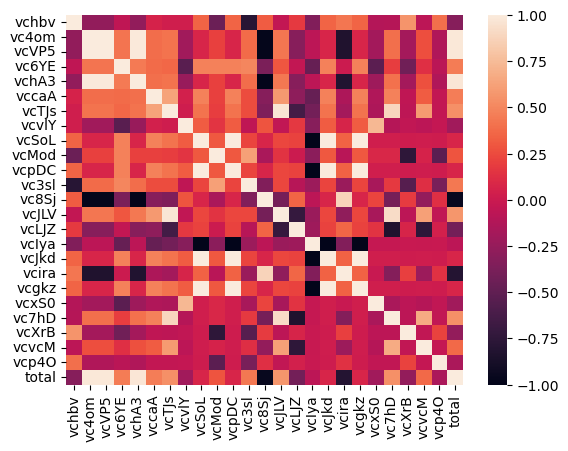

In [50]:
sns.heatmap(df2.corr())

In [52]:
corr_matrix = df2.corr()
corr_matrix

,vchbv,vc4om,vcVP5,vc6YE,vchA3,vccaA,vcTJs,vcvlY,vcSoL,vcMod,...,vcIya,vcJkd,vcira,vcgkz,vcxS0,vc7hD,vcXrB,vcvcM,vcp4O,total
vchbv,1.000000,-0.269139,-0.269139,-0.058770,-0.266182,0.059430,0.029980,0.024422,0.348217,-0.445610,...,-0.348217,0.348217,0.423674,0.348217,-0.109622,-0.107148,0.562060,-0.071322,0.394073,-0.320646
vc4om,-0.269139,1.000000,1.000000,0.416149,0.989011,0.387357,0.408747,-0.200775,0.074949,0.207961,...,-0.074949,0.074949,-0.830727,0.074949,-0.191295,0.398115,-0.186190,0.265001,-0.130542,0.979174
vcVP5,-0.269139,1.000000,1.000000,0.416149,0.989011,0.387357,0.408747,-0.200775,0.074949,0.207961,...,-0.074949,0.074949,-0.830727,0.074949,-0.191295,0.398115,-0.186190,0.265001,-0.130542,0.979174
vc6YE,-0.058770,0.416149,0.416149,1.000000,0.441769,0.379418,0.361293,-0.538561,0.475404,0.470523,...,-0.475404,0.475404,0.000235,0.475404,-0.525946,0.189115,-0.429319,0.125882,-0.081409,0.446125
vchA3,-0.266182,0.989011,0.989011,0.441769,1.000000,0.390925,0.412660,-0.234659,0.074125,0.205675,...,-0.074125,0.074125,-0.821598,0.074125,-0.218275,0.402538,-0.184144,0.267946,-0.129107,0.970259
vccaA,0.059430,0.387357,0.387357,0.379418,0.390925,1.000000,0.628479,0.044544,0.470858,0.208462,...,-0.470858,0.470858,-0.141390,0.470858,-0.132248,0.470650,-0.059789,0.313284,-0.041920,0.460574
vcTJs,0.029980,0.408747,0.408747,0.361293,0.412660,0.628479,1.000000,0.016827,0.408506,0.194396,...,-0.408506,0.408506,-0.185273,0.408506,-0.145006,0.884415,-0.065557,0.588702,-0.045964,0.539682
vcvlY,0.024422,-0.200775,-0.200775,-0.538561,-0.234659,0.044544,0.016827,1.000000,0.319048,0.151193,...,-0.319048,0.319048,0.067763,0.319048,0.729848,-0.109313,-0.050562,-0.072763,-0.035450,-0.196300
vcSoL,0.348217,0.074949,0.074949,0.475404,0.074125,0.470858,0.408506,0.319048,1.000000,0.303457,...,-1.000000,1.000000,0.343743,1.000000,0.030527,0.029838,0.013801,0.019861,0.009676,0.077495
vcMod,-0.445610,0.207961,0.207961,0.470523,0.205675,0.208462,0.194396,0.151193,0.303457,1.000000,...,-0.303457,0.303457,-0.086388,0.303457,0.084704,0.082792,-0.753858,0.055110,-0.528547,0.285480


In [53]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

13


In [55]:
columns_to_drop = set(columns_to_drop)
len(columns_to_drop)

7